In [1]:
#visual = [47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
visual = [41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54]
#somatomotor = [1, 2, 13, 14, 15, 16, 61, 62, 73, 74, 83, 84, 85, 86]
somatomotor = [1, 2, 13, 14, 15, 16, 55, 56, 67, 68, 69, 70, 71, 72]
#dorsal_attention = [63, 64, 65, 72]
dorsal_attention = [57, 58, 59, 66]
#ventral_attention = [7, 33, 34, 37, 38, 67, 68]
ventral_attention = [7, 33, 34, 37, 38, 61, 62]
#limbic = [17, 18, 23, 24, 25, 26, 27, 29, 30, 87, 88, 91, 92, 93, 94]
limbic = [17, 18, 23, 24, 25, 26, 27, 29, 30, 73, 74, 77, 78, 79, 80]
#frontoparietal = [5, 6, 9, 10, 8, 28, 66]
frontoparietal = [5, 6, 9, 10, 8, 28, 60]
#default = [3, 4, 11, 12, 19, 20, 21, 22, 31, 32, 35, 36, 39, 40, 69, 70, 71, 89, 90]
default = [3, 4, 11, 12, 19, 20, 21, 22, 31, 32, 35, 36, 39, 40, 63, 64, 65, 75, 76]

In [2]:
import os
if os.getcwd().split("/")[-1] == "examples":
    os.chdir('..')
    
# This will reload all imports as soon as the code changes
#get_ipython().run_line_magic('load_ext', 'autoreload')
#get_ipython().run_line_magic('autoreload', '2')


# In[6]:

import matplotlib.pyplot as plt
#try:
#    import matplotlib.pyplot as plt
#except ImportError:
#    import sys
#    get_ipython().system('{sys.executable} -m pip install matplotlib')
#    import matplotlib.pyplot as plt

import sys    
import numpy as np

from neurolib.models.aln import ALNModel
from neurolib.utils.parameterSpace import ParameterSpace
from neurolib.optimize.exploration import BoxSearch

from neurolib.models.wc import WCModel
from neurolib.utils.loadData import filterSubcortical
from scipy.io import loadmat
from neurolib.utils.loadData import Dataset
import neurolib.utils.loadData as ld
import neurolib.utils.functions as func
import neurolib.utils.devutils as du

# a nice color map
plt.rcParams['image.cmap'] = 'magma'

def averageMat(Mat):
    avMat = np.zeros((94,94))
    for i in range(len(Mat)):
        avMat = avMat + Mat[i]
    avMat = avMat/len(Mat)
    return avMat


#data_path = "/mnt/raid/data/MScTheses/msc_pamir/SCZ-FC-modelling"

data_path = "/Users/pamirozsuna/Desktop/msc_pamir/SCZ-FC-modelling"


C_data = np.load(data_path+"/AvgCmatrixHC.npy")
D_data = np.load(data_path+"/AvgDmatrixHC.npy")

Cmat_tmp = averageMat(C_data)
Dmat_tmp = averageMat(D_data)

Cmat = filterSubcortical(Cmat_tmp)
Dmat = filterSubcortical(Dmat_tmp)

FC_data = np.load(data_path+"/AvgFmatrixHC.npy")
timeseries = np.load(data_path+"/AvgTmatrixHC.npy")

FC_tmp = averageMat(FC_data)
FCs = filterSubcortical(FC_tmp)

C_data_scz = np.load(data_path+"/AvgCmatrixSCZ.npy")
D_data_scz = np.load(data_path+"/AvgDmatrixSCZ.npy")

Cmat_tmp_scz = averageMat(C_data_scz)
Dmat_tmp_scz = averageMat(D_data_scz)

Cmat_scz = filterSubcortical(Cmat_tmp_scz)
Dmat_scz = filterSubcortical(Dmat_tmp_scz)

FC_data_scz = np.load(data_path+"/AvgFmatrixSCZ.npy")
timeseries_scz = np.load(data_path+"/AvgTmatrixSCZ.npy")

FC_tmp_scz = averageMat(FC_data_scz)
FCs_scz = filterSubcortical(FC_tmp_scz)

In [3]:
def calculate_region_gbc(indices, bold_signal):
    tmp = []
    for i in indices:
        tmp.append(bold_signal[i-1])
    return np.mean(tmp)

In [4]:
hc = [[0.6647479920504153,
  0.6615764691964667,
  0.6626762783683842,
  0.526778070500973,
  0.6840604048727901,
  0.7587968442891303,
  0.6605761286808856,
  0.5319916752292896,
  0.7830985853408662,
  0.7011123727659263,
  0.8170907164511276,
  0.7040914446081844,
  0.5860097646787893,
  0.6883224457669526,
  0.4457058272136108,
  0.5599276746549026,
  0.45372096086070457,
  0.710545084882872,
  0.6601034671662893,
  0.588185643039317,
  0.5250156098089527,
  0.6059545303508215,
  0.7256633637070988,
  0.5114222096242644,
  0.5580517070781333,
  0.7002876805489737,
  0.6995489985716912,
  0.7026912592360356,
  0.5585891486361863,
  0.6105447051826574,
  0.7005469599076032,
  0.7120007794163596,
  0.7079519514738485,
  0.7285643373836965,
  0.5390923679132535,
  0.8083726292486385,
  0.6815714939547772,
  0.7848144958746939,
  0.7106011206848435,
  0.5746285407466859,
  0.7295884867310303,
  0.6409187046206374,
  0.6800477711584278,
  0.5222840400587042,
  0.5550368169660552,
  0.7780778351172042,
  0.7235962924309908,
  0.46837537739725577,
  0.6360516484276157,
  0.6411498534878506,
  0.5949340922912058,
  0.7321319724249599,
  0.4869141480548111,
  0.6678649553902529,
  0.6336779911153491,
  0.795267660309454,
  0.6152715252852226,
  0.4570865354950266,
  0.6292285164269031,
  0.7287478939075162,
  0.7824398941642345,
  0.5397699140380985,
  0.7289460717494752,
  0.545452438474929,
  0.6199421227417596,
  0.5999223642477453,
  0.6149662323830102,
  0.7212697832517382,
  0.6732300466994015,
  0.6945197049208159,
  0.7580824562632563,
  0.6226318580787376,
  0.5887042929067655,
  0.7767136495420226,
  0.5311731046611256,
  0.663485360802209,
  0.631798340772364,
  0.51282404541506,
  0.7385105691008357,
  0.6856918251571422,
  0.6618678840589581,
  0.6679971550722396,
  0.6888639188694459,
  0.5293285126830186,
  0.6659421641876956,
  0.7262316623533059,
  0.80923596826876,
  0.6627956042702627,
  0.7140505662915027,
  0.6542634311879156,
  0.7501966884039964,
  0.798927144040359,
  0.6896240788698184,
  0.6382154300662126,
  0.6069811903165687,
  0.7242237954393155,
  0.6861308031376387,
  0.5209895020701195,
  0.6538885268317306,
  0.6361975941665824],
 [0.6304749024068818,
  0.5868367752641143,
  0.5160032900934768,
  0.4618308118643373,
  0.5919961314561915,
  0.6871796816194168,
  0.5734290272077944,
  0.40018502551641505,
  0.702195349916625,
  0.6422004874559154,
  0.76252579745785,
  0.5533215832827442,
  0.5694423588826935,
  0.5662144632290371,
  0.40381161764041706,
  0.3838526858350066,
  0.4216228914792614,
  0.5260625604473812,
  0.5861643711559401,
  0.4536304787580965,
  0.4649641820223905,
  0.38729234564525233,
  0.6395802336818756,
  0.4582434802724046,
  0.4378233795034448,
  0.6704704328534992,
  0.598687357993003,
  0.6356769474141669,
  0.4477425298745297,
  0.6118465151382956,
  0.6688769718565238,
  0.5956584208881546,
  0.6502156876234187,
  0.5255753970363137,
  0.5043598715384221,
  0.7169276206558948,
  0.703414936552213,
  0.7440344245427064,
  0.5895064234239771,
  0.3993972472672745,
  0.6721449862343358,
  0.5179966934714396,
  0.6243465416544746,
  0.4323638610224488,
  0.39030473486301925,
  0.7345529203540453,
  0.6790124558819016,
  0.36527041789560166,
  0.6035541370448109,
  0.548177267518828,
  0.5455702245279394,
  0.6992930131414262,
  0.4271273039333574,
  0.5250624771524603,
  0.5740955754509991,
  0.6270126422929759,
  0.5081890778524173,
  0.492644797141394,
  0.42669234742851647,
  0.6387824148174702,
  0.754969415079415,
  0.4517249212054606,
  0.6849800655550755,
  0.44298068951575553,
  0.5717069615642203,
  0.4366509130745042,
  0.5389303934149985,
  0.664875186897851,
  0.6473102306473704,
  0.6081435062585767,
  0.6563005843205648,
  0.4625447438423687,
  0.5395556554111895,
  0.7057890173171314,
  0.4914927713358655,
  0.5837701054501462,
  0.5792641839730115,
  0.4304353615673444,
  0.6184224500497767,
  0.6294261947604977,
  0.5603712168495855,
  0.5954441492500148,
  0.6237005307731261,
  0.4694835599320937,
  0.6509242894176477,
  0.6931213697865567,
  0.7840786551415501,
  0.5594508974592953,
  0.6897118118842634,
  0.49035524218646825,
  0.7097324730960011,
  0.749753003318043,
  0.5170759705792499,
  0.5228747750847335,
  0.46863057964569593,
  0.5972443608173617,
  0.5364375648440104,
  0.4407532714553626,
  0.5428836883520033,
  0.6138779314830106],
 [0.6348796932826546,
  0.5368684957740228,
  0.548487698557827,
  0.45915510123860254,
  0.5940644003167419,
  0.7067709871125614,
  0.6328070623853478,
  0.4558591361004627,
  0.73483876385094,
  0.6087443340575697,
  0.7306830645258188,
  0.6150798769745347,
  0.5375427264082482,
  0.5406286966768385,
  0.36544332554551034,
  0.3812474168930224,
  0.34376816212593875,
  0.5598327864256658,
  0.5624724675187565,
  0.46092386155845616,
  0.4585979044847379,
  0.5590385826298823,
  0.7117846481940099,
  0.4643883715544604,
  0.45751238207423944,
  0.6464884826599652,
  0.58700894473578,
  0.5943337262880014,
  0.45644218540392645,
  0.5624277781385485,
  0.5811406464923383,
  0.5637091068377906,
  0.6508598005266475,
  0.5809866027149984,
  0.44488439277615244,
  0.7820428521542631,
  0.6834070710255516,
  0.7409502708288562,
  0.5483157877354911,
  0.48594237289766234,
  0.6640553988026258,
  0.5616720383636306,
  0.6454468630733853,
  0.43080825024235114,
  0.43184735900181914,
  0.7499463776368084,
  0.6171561590749925,
  0.38007258498284885,
  0.5615309714847445,
  0.5819548427984158,
  0.5500045980565214,
  0.7264321855575215,
  0.381434099113699,
  0.6044359938454775,
  0.5420497231886181,
  0.7386330360452724,
  0.5388507544743415,
  0.3832720475320966,
  0.47935153521399787,
  0.6889363188289275,
  0.7355927602578225,
  0.45975977286621666,
  0.6582954745067477,
  0.4101770804335496,
  0.5578359933017989,
  0.5272774968719508,
  0.556219950658381,
  0.7003811599607489,
  0.639865980364374,
  0.6635544045300513,
  0.7001993064760519,
  0.4930272807949091,
  0.4359780669445513,
  0.7478955288693202,
  0.4684069106880804,
  0.515764952353113,
  0.6075122089908707,
  0.39728846070358287,
  0.6800394124562177,
  0.6601202921130052,
  0.624435126421017,
  0.607670677100368,
  0.6066319515493201,
  0.4708857183344011,
  0.6349363648002917,
  0.7017468584514838,
  0.7617379159912834,
  0.5996599991635966,
  0.6514290850980553,
  0.4850366885998435,
  0.6542289312806252,
  0.783160613544876,
  0.5835858230421318,
  0.5596817985267226,
  0.5721642763733772,
  0.6560582517464548,
  0.606862055792641,
  0.43150942506819356,
  0.5420511463396485,
  0.609168898744796],
 [0.6949145058122247,
  0.644946510121139,
  0.6140248751670218,
  0.5619125937533118,
  0.6589115742107435,
  0.7087595946496257,
  0.6122261441033887,
  0.47640157131433564,
  0.7546043005596476,
  0.71842633078005,
  0.7823018217002391,
  0.6316632216689945,
  0.636582043056939,
  0.6032204158838685,
  0.4476959716880805,
  0.4631396135294415,
  0.5498931459997145,
  0.6435130364170594,
  0.6009147408006156,
  0.5252162369365575,
  0.5199176834570843,
  0.5302782746283294,
  0.6999659679678958,
  0.5348575230210457,
  0.5357870041324038,
  0.6599491301122491,
  0.6413651308472069,
  0.6845783441883996,
  0.5171501626868529,
  0.5869004417492635,
  0.7164285485389117,
  0.7271344856566799,
  0.7020287834718217,
  0.6451204649272225,
  0.5673634740032997,
  0.7954033529240241,
  0.7357534594249385,
  0.8137640104131607,
  0.6688169124708372,
  0.5167072572005239,
  0.7121867007342783,
  0.5873267658753571,
  0.7012747979894605,
  0.4573892708141037,
  0.5050066815761725,
  0.7615620699998052,
  0.7342743276961583,
  0.4282826624961309,
  0.6744564624488522,
  0.5848737269569505,
  0.6284342700297629,
  0.7279929740636023,
  0.47100548854274477,
  0.5972080988443453,
  0.6244088349302813,
  0.7847860744322845,
  0.5581507511462757,
  0.5645550128287571,
  0.5758997704801702,
  0.6882752760137563,
  0.7871152265847177,
  0.5164315665528434,
  0.7246098451151426,
  0.46213161570144257,
  0.6346578928275587,
  0.5211861477160256,
  0.5576336870036049,
  0.6834894371514106,
  0.6695897535053543,
  0.6705461597603846,
  0.7279437729926579,
  0.514599365432449,
  0.6006045071884032,
  0.7238918080482225,
  0.5261040308409656,
  0.6488855701461765,
  0.6184868663471651,
  0.498433035523352,
  0.7041882289973641,
  0.705004898771595,
  0.6129453363668792,
  0.6323725429734494,
  0.7097279625124563,
  0.46962152969259013,
  0.7251091582302617,
  0.7191925540273633,
  0.7764331110219619,
  0.640274767185177,
  0.6870308574992314,
  0.5700470739941369,
  0.7582996874524109,
  0.7770623445438801,
  0.623378664403792,
  0.5831548981803772,
  0.536449032955519,
  0.6827613711179978,
  0.617189815587586,
  0.47991393682946587,
  0.5628128411233229,
  0.6876768452056901],
 [0.5835668821315402,
  0.5910441891768843,
  0.5583256972993196,
  0.376586769143481,
  0.5171650029391394,
  0.7017172843150964,
  0.5072957567777133,
  0.43188900464103047,
  0.6983476117793811,
  0.6716223806524262,
  0.7140444793766095,
  0.5956953190142613,
  0.4882428850135527,
  0.5923338672928029,
  0.3996839729191735,
  0.4759383163632422,
  0.41343374127269483,
  0.6538709674806734,
  0.5896605104943443,
  0.5619838168948117,
  0.38954289018415283,
  0.525847371757275,
  0.638909000659843,
  0.34144317332876994,
  0.4147224848060184,
  0.5532878628135331,
  0.6398306254639475,
  0.6269994792219101,
  0.47340815942354275,
  0.5169509960752843,
  0.6688811596589358,
  0.6394910221012448,
  0.5625001702518319,
  0.677809517334637,
  0.4480705013868002,
  0.7393161373050086,
  0.6135564002627298,
  0.746848555275664,
  0.6692971779256301,
  0.40081632607743956,
  0.6083615501138735,
  0.5210832212070362,
  0.576490229488961,
  0.3568850840309213,
  0.45428523649451547,
  0.6677252119720809,
  0.6951984521110184,
  0.27177152671766097,
  0.5326296560193491,
  0.5266854942827257,
  0.4669957891586826,
  0.6518915648041602,
  0.40563608724638817,
  0.5429727065952237,
  0.5485018801269744,
  0.7868752591044079,
  0.4536510996123991,
  0.5057141464262813,
  0.5525533434713664,
  0.546926434454648,
  0.701782314814792,
  0.3893146336578012,
  0.5693618316366479,
  0.4386699069819168,
  0.5263872613515256,
  0.5075895508193128,
  0.4902032774917317,
  0.6461813874756632,
  0.6121773393030251,
  0.5949881113298073,
  0.7170932312693017,
  0.4318011846808169,
  0.5131290471622239,
  0.6858372562150387,
  0.44228521080859934,
  0.5513510287259417,
  0.5702013028026042,
  0.4445862819987548,
  0.5890013808296123,
  0.6102750795409224,
  0.5058571628902143,
  0.5496149445134485,
  0.5664883741828733,
  0.39904029848116246,
  0.5935466880774737,
  0.617903810437849,
  0.7773941282908154,
  0.5278234233452398,
  0.6780970284528676,
  0.5967063568538878,
  0.7147500482000819,
  0.7362925974054613,
  0.6164686029435174,
  0.5599127798216431,
  0.4142459061822038,
  0.6449079117172958,
  0.520879403067814,
  0.39327003091232776,
  0.5378885058137104,
  0.5720565139002375],
 [0.5518282963230984,
  0.6059839396404004,
  0.547863679111275,
  0.41036427641626283,
  0.5749078581011704,
  0.6488315106609627,
  0.56649098606635,
  0.3903610462107644,
  0.7354402174007522,
  0.6565281573911331,
  0.7043272728591485,
  0.6360404520989319,
  0.47831807877385324,
  0.6001615211425101,
  0.3656215300956883,
  0.41469336003166013,
  0.4636920792057902,
  0.629675078908152,
  0.5397032884802142,
  0.5186580243053519,
  0.3639658266397797,
  0.4685564301441626,
  0.6452725185404985,
  0.32585066804048135,
  0.39634265908705596,
  0.5373579909915376,
  0.5915028032685687,
  0.5620693927966626,
  0.43093322418535784,
  0.4605474322326401,
  0.6987428235488831,
  0.6395246515816784,
  0.5847457808550633,
  0.6463437485184094,
  0.4310680602042068,
  0.7846704028169978,
  0.5897279694227371,
  0.7958677131801415,
  0.6204919789922921,
  0.3910897190056876,
  0.6205597831056991,
  0.5336669854646373,
  0.6269036998593136,
  0.2913525052036549,
  0.3935456106700564,
  0.6722413691913902,
  0.6875651568660569,
  0.32453023334317865,
  0.5140720370693236,
  0.49416720230238115,
  0.4466516042700333,
  0.5951069712402525,
  0.40335409102448927,
  0.5262020745919233,
  0.5703691123318957,
  0.8093867515757384,
  0.4555527126804837,
  0.4649240741668733,
  0.48153745665431585,
  0.6263659051392022,
  0.7559662954852957,
  0.38791952693585774,
  0.5853631583984303,
  0.4681574451220792,
  0.5577846997218732,
  0.41403873732956925,
  0.4513444679823476,
  0.5724145894995715,
  0.6087038206865506,
  0.5483451845445325,
  0.703496220248102,
  0.5215673727672715,
  0.5633075150473924,
  0.6250309786674481,
  0.4614502735103002,
  0.5349711143537123,
  0.5834407784856207,
  0.4392076774058409,
  0.5502976852091477,
  0.6030414636613248,
  0.5166540406122451,
  0.5158937193844131,
  0.6142125166315052,
  0.3771176915776009,
  0.6437478370659845,
  0.5926426065993067,
  0.7208560476438308,
  0.501909288260131,
  0.6322336983314375,
  0.5669504639819896,
  0.7167234090897836,
  0.7266555387498148,
  0.5542593282691699,
  0.4560471348738841,
  0.3925962081430624,
  0.5903466670739836,
  0.5663616107395051,
  0.4441297778243485,
  0.48623552073219745,
  0.6111176677396312],
 [0.6014400062334533,
  0.5384789195132427,
  0.5480743777445958,
  0.4043399830955288,
  0.5348835219936595,
  0.679984979730463,
  0.5489448481739123,
  0.398930856761708,
  0.6869320055035144,
  0.6448594464018923,
  0.7214824123756785,
  0.6053077958350213,
  0.49508801236912914,
  0.6114326782434671,
  0.3524971619906894,
  0.4056726786112952,
  0.38654117628707757,
  0.6085614137810617,
  0.5625882715417374,
  0.4805243475275153,
  0.3820834272421108,
  0.4524088699802364,
  0.6169389217105838,
  0.36880122589036113,
  0.43431820115074565,
  0.6415893467893634,
  0.6039953898687869,
  0.5923060979209276,
  0.4241767927960359,
  0.5158321707417415,
  0.6314454116872563,
  0.6367966970378904,
  0.5981629043635611,
  0.6234206238531261,
  0.4501597716313432,
  0.7233408195909178,
  0.6420155758697373,
  0.7320869640405882,
  0.6138145945064238,
  0.38216144690604525,
  0.6410586234691521,
  0.4941055701559174,
  0.5773596775554799,
  0.35052602065122035,
  0.3566451330131037,
  0.714547762763404,
  0.6973378945405999,
  0.2984018846838998,
  0.544579060868224,
  0.49111324105213355,
  0.4688312632521002,
  0.6873039403480669,
  0.354549723643123,
  0.5158818979509172,
  0.527157011363471,
  0.7291874668973072,
  0.4756395243969199,
  0.4196292362231507,
  0.5275352257607631,
  0.5878305771692864,
  0.734732193001137,
  0.3899126566684118,
  0.6396881921979068,
  0.4678495249091944,
  0.5125023470804794,
  0.4614993468752814,
  0.48731532950844547,
  0.6530731115967391,
  0.6079056459086455,
  0.5633264897524637,
  0.6912120371690484,
  0.4723166815918531,
  0.4803905679597814,
  0.686720041424366,
  0.4308165524483535,
  0.5727416738638065,
  0.5902939054489443,
  0.44959856956943367,
  0.6122466708832061,
  0.5964943420506829,
  0.5043641624187609,
  0.5726158138315952,
  0.6087484373100366,
  0.37331438950220447,
  0.5883680893742673,
  0.6489355685777548,
  0.7593281152868206,
  0.5009413709860474,
  0.6472960005700488,
  0.5375822008177117,
  0.6819801674149802,
  0.7284041035409219,
  0.5863145192975012,
  0.5119807975167417,
  0.43583050694676134,
  0.6256091083965208,
  0.5419048025296934,
  0.44174521688256724,
  0.5285418139184613,
  0.5553533374200753]]

In [5]:
scz = [[0.5515067162427116,
  0.465385778477956,
  0.5924314947190606,
  0.4918664188888619,
  0.3177914344645981,
  0.4960575613781789,
  0.5854963960084636,
  0.6795905991385545,
  0.44923390665903484,
  0.5011807619994955,
  0.626938684701018,
  0.6044805205125369,
  0.49019087329564653,
  0.5666822589831213,
  0.5826363536043193,
  0.5915751657015095,
  0.2885439814294638,
  0.45456200667436003,
  0.6553993380091183,
  0.5788106467379008,
  0.5727841372138425,
  0.6375421844593232,
  0.5904475253619116,
  0.5641422467037516,
  0.5425509354884194,
  0.7166310946075415,
  0.646249749362883,
  0.4355051940985245,
  0.5489126137291246,
  0.6698961660720213,
  0.6451063752802696,
  0.40212056351169523,
  0.540947283623136,
  0.6098517484028552,
  0.6515119575415007,
  0.7262562449657787,
  0.5758731338208962,
  0.47177591672456193,
  0.36428165788542316,
  0.5565932722980201,
  0.42911455831405926,
  0.469242018066688,
  0.5648326308540901,
  0.5005252922645397,
  0.40193211753068314,
  0.5774240144263363,
  0.6475171633246356,
  0.6435867008259313,
  0.6788770127248888,
  0.4544863973863083,
  0.6131656033266061,
  0.4908119155660655,
  0.614941242710531,
  0.6012236878000814,
  0.5468759901225222,
  0.539437684003954,
  0.6774788508431038,
  0.7130178931276392,
  0.5936845371459076,
  0.6763709812532269,
  0.5826086443588084,
  0.559569213006157,
  0.5589295314533952,
  0.5197609974981753,
  0.5001557469291263,
  0.7015714916325128,
  0.6226294349494933,
  0.5232997751989338,
  0.5786374484817106,
  0.41051699567002853,
  0.5257428340645423,
  0.6110591030217242,
  0.4972051672159358,
  0.6132629232275719,
  0.5571925218269766,
  0.357552706106868,
  0.632861099582894,
  0.462057507431871,
  0.48059844910333577,
  0.40395241509737895,
  0.6657810379497442,
  0.5694132821305241,
  0.597162835460635,
  0.6924301982581744,
  0.567148534274936,
  0.6926497617836019,
  0.729935002006682,
  0.5770444953870206,
  0.5109766337138976,
  0.5822336449763789,
  0.6361379524854169,
  0.5441909310401144,
  0.4975404988408212,
  0.42402742591058984,
  0.5710469329463618,
  0.5925823857662521,
  0.5002663281291774,
  0.5489695771328706,
  0.4211483666276195,
  0.6817085764633822],
 [0.37063076931215566,
  0.2569240700433902,
  0.3464436574977017,
  0.3821320780740294,
  0.2375695897197134,
  0.4077735224812539,
  0.448651205946956,
  0.5682421120274216,
  0.25939487165778846,
  0.4951662945788267,
  0.48079579393999033,
  0.3616872007970778,
  0.242093123971263,
  0.4417808537064568,
  0.36528587283301606,
  0.43838640873473256,
  0.33563280862647227,
  0.325590293987586,
  0.5313542125559393,
  0.319112510150444,
  0.5094977407305756,
  0.48459163307432523,
  0.5008705222998929,
  0.5166321971119997,
  0.26917501100626795,
  0.5905964542933635,
  0.445175338094279,
  0.2701128376188135,
  0.47242480575044954,
  0.44446080370300683,
  0.4602336024522243,
  0.20666566670348213,
  0.35656245328426633,
  0.3998831278976906,
  0.6423114396352825,
  0.5453821391183351,
  0.617090356251866,
  0.3812888797822495,
  0.2843685620357972,
  0.4210453126872686,
  0.31273028647152373,
  0.44870664312306346,
  0.32533630503710964,
  0.5563105785370882,
  0.3279349310524223,
  0.4595119522596162,
  0.6539923490540324,
  0.49044819183567867,
  0.553947778472716,
  0.2525755746428528,
  0.49765653317876724,
  0.2532536900471095,
  0.2883811259004234,
  0.24022244938460474,
  0.45192719310793894,
  0.3310510505626354,
  0.5052025911490828,
  0.5887341874592936,
  0.3930525212458346,
  0.5364801711201769,
  0.37510442640403824,
  0.409484894297247,
  0.42554822656934316,
  0.3251541466732084,
  0.3762526793551088,
  0.5642198744062806,
  0.4379992247821365,
  0.3210712506521498,
  0.4477328646327606,
  0.23668272685204897,
  0.43621029708175296,
  0.5465322799483143,
  0.33768230622415557,
  0.5217647805625296,
  0.5011389316584373,
  0.25890503552623223,
  0.4221365802564786,
  0.4540285878276156,
  0.25144986850027445,
  0.4145569241040247,
  0.5717951408583949,
  0.35467483448864284,
  0.485920516552414,
  0.512563458600068,
  0.47979601637500197,
  0.713203123731092,
  0.6438253270056407,
  0.3912647402229821,
  0.3715162794468198,
  0.4404097943987107,
  0.4738867138573397,
  0.2816534060875001,
  0.43597095528078894,
  0.31834494624894044,
  0.4520792116002441,
  0.44362582737234124,
  0.481509231854887,
  0.5645363431246555,
  0.35655666324960367,
  0.5829585208429457],
 [0.3294206642403184,
  0.29192890714769965,
  0.27231926109729976,
  0.2518519724450231,
  0.10741971597921944,
  0.5156741004945193,
  0.5097995544190355,
  0.5697879867122163,
  0.200543998305027,
  0.3494135354451545,
  0.3524128905009444,
  0.5465889136044102,
  0.35135480834028765,
  0.36819364303672375,
  0.46878703132613764,
  0.5119776392762038,
  0.2845844643885959,
  0.2952831932480063,
  0.6265023703352354,
  0.3422515856611702,
  0.2829735534098802,
  0.3798849948199511,
  0.4864550927540767,
  0.4244299810736141,
  0.4709651984565042,
  0.40479051682688266,
  0.4791645477526714,
  0.2464089371037928,
  0.25046731264957234,
  0.5094146150242124,
  0.24649646168282002,
  0.2717602953413219,
  0.4696564491732028,
  0.46119106388771236,
  0.5017508438995762,
  0.6302454858447855,
  0.6350009130238946,
  0.362459177700598,
  0.11777860944572136,
  0.4494323072742256,
  0.4160548086644515,
  0.4914100282880428,
  0.2661353360178004,
  0.4427294439946599,
  0.2809985403055879,
  0.47452063182620235,
  0.5904611903775129,
  0.5430226710855519,
  0.6336548666339271,
  0.3343252262418629,
  0.5922063269814759,
  0.3247392431372146,
  0.3856351314708922,
  0.2567998744904919,
  0.39444227444362867,
  0.34049127902314613,
  0.5404821612100699,
  0.3845648083774168,
  0.33361986581661585,
  0.5934000491765985,
  0.23317001340684715,
  0.3800642329813061,
  0.3921168666851354,
  0.20672172066279373,
  0.4578717020335441,
  0.3991350799388216,
  0.1383347302978803,
  0.37250387024083237,
  0.5055301028362365,
  0.2653959089276877,
  0.2876312358791539,
  0.47483414326823536,
  0.19234876048373678,
  0.5587903360792935,
  0.44997319878391656,
  0.32437453304786,
  0.5415668292193225,
  0.3844172134937621,
  0.1103114721047412,
  0.46747481751494213,
  0.5844395914869429,
  0.36822630451095006,
  0.38324724251850356,
  0.47558634368631847,
  0.3932857824500735,
  0.6300910157714353,
  0.4969178410401457,
  0.4824284564897189,
  0.3547901874281304,
  0.39006780756620174,
  0.5029647807710023,
  0.4870207196675671,
  0.29354062448376894,
  0.2977058440801855,
  0.43342339805707847,
  0.5983234177687125,
  0.4297729200643385,
  0.5201141864196936,
  0.31867572785342746,
  0.5529995844720362],
 [0.31725486008414744,
  0.1642862929574672,
  0.39940100555347186,
  0.45489750156745695,
  0.16534583487920587,
  0.40708838738024394,
  0.4711907415479542,
  0.5461632530414507,
  0.24166863227343763,
  0.3975133951309037,
  0.49125924666195714,
  0.4424694730171692,
  0.21333660191073772,
  0.4584170891563651,
  0.392451359165374,
  0.5081429993566582,
  0.2777676031331085,
  0.30842369941982645,
  0.5289905116996294,
  0.3492781615758655,
  0.5200755713749365,
  0.43343953447455613,
  0.5228816994606929,
  0.4907352815357332,
  0.2305888320195444,
  0.5146110656041586,
  0.5307187814865633,
  0.3098511296059966,
  0.44988251655488665,
  0.5270393751285937,
  0.5082227680189005,
  0.2069729813316697,
  0.3060799936072636,
  0.5402239017959104,
  0.6621230064109872,
  0.5656460366182264,
  0.6314164463128524,
  0.3955016805462182,
  0.30293731077715824,
  0.48272944911623217,
  0.32823845372180127,
  0.40947211523598087,
  0.32066065721040576,
  0.524917229182074,
  0.32243788590093564,
  0.38908682666057226,
  0.6256690369484712,
  0.46559511270022985,
  0.4917024816878014,
  0.3125244814247032,
  0.4619131614732334,
  0.28741541206098403,
  0.3991908367343908,
  0.3189582402150706,
  0.4476992899523486,
  0.2462354349594597,
  0.583067154531253,
  0.6077753482211278,
  0.4421013765175847,
  0.5314913604288128,
  0.3737088895910915,
  0.4024852168000315,
  0.37861172496960355,
  0.2579045856080306,
  0.35087844034335797,
  0.5298261579208977,
  0.4251831141417866,
  0.26916202211653806,
  0.47768925844555366,
  0.22086701113272206,
  0.3729077838997992,
  0.5209294097080145,
  0.3810738936533946,
  0.5367443063493103,
  0.3038907969095585,
  0.23911889190541885,
  0.5011002129486867,
  0.41956104022047763,
  0.26051265427542003,
  0.29495317651460284,
  0.5513338025825864,
  0.40495404312322386,
  0.4561276834419864,
  0.5316820382975891,
  0.4087664029086759,
  0.6920667042470026,
  0.6503877668163232,
  0.4140231807702285,
  0.23706012895283365,
  0.5006784786285362,
  0.5114460026591428,
  0.34949806358225194,
  0.44989850998520364,
  0.23892872054447326,
  0.46246322492402314,
  0.36733119449505547,
  0.45559506947140493,
  0.45815847657067993,
  0.330203523423877,
  0.557199921331228],
 [0.446353822042472,
  0.29254858219771973,
  0.5167308353738914,
  0.4534655915393618,
  0.17596986815546264,
  0.43635526705841166,
  0.4620722235573431,
  0.6024416354563806,
  0.3703342737275608,
  0.4294810094049002,
  0.46279883782432746,
  0.5751364414148987,
  0.33982397488741517,
  0.4717310981560166,
  0.407970410782745,
  0.5611170053421703,
  0.2581461702515233,
  0.31616496817775164,
  0.5994944262542269,
  0.4613209772500853,
  0.4061654850935156,
  0.5137588154599109,
  0.5915412729820353,
  0.3008718069442974,
  0.3761450754494589,
  0.667064174035919,
  0.59475331189385,
  0.42482827541739854,
  0.4107625602126697,
  0.607245477765934,
  0.6279623500020013,
  0.27635421263866095,
  0.33877731979196796,
  0.5689398733739188,
  0.6858349232539971,
  0.7173215014971749,
  0.573506344556953,
  0.3911562706798453,
  0.3191619177916468,
  0.4637610335534068,
  0.3897570926536204,
  0.3469159681469039,
  0.5177691056390695,
  0.42380869894643086,
  0.21227204195190635,
  0.42449538349372945,
  0.5544064381277477,
  0.4427688421053576,
  0.5749284014611054,
  0.26011289622840633,
  0.5774996580681453,
  0.368081065667285,
  0.5948707229171724,
  0.4388986600865797,
  0.42675328927021194,
  0.3410333122874142,
  0.6072888374327055,
  0.6217936510261792,
  0.5914374644610964,
  0.6115691105973644,
  0.45512119998156514,
  0.465731907483879,
  0.4672529089618723,
  0.422461143254222,
  0.4338244084101339,
  0.6751211226903553,
  0.5722566242427174,
  0.35232992990514533,
  0.41200985852976,
  0.23949967159285432,
  0.5239571634298696,
  0.5247468201325273,
  0.44077601906442737,
  0.5152386937259988,
  0.35412619353508556,
  0.22677522297172378,
  0.5112322761040458,
  0.4545670127148429,
  0.34720756797010777,
  0.3695337587291366,
  0.5767650457519005,
  0.4149473402767817,
  0.45421916101451987,
  0.5960898033233346,
  0.47228672940623445,
  0.6455203545644832,
  0.7513600857750015,
  0.5601279517701372,
  0.3420548386498876,
  0.5009027906439463,
  0.5741829406888942,
  0.5121226669501135,
  0.4627398685723832,
  0.37178067784897056,
  0.5088512434737292,
  0.42630008820369997,
  0.4153418594485908,
  0.5334263822195328,
  0.38763734518979814,
  0.6479723690971244],
 [0.4526106745785588,
  0.17704502207157116,
  0.503864569676946,
  0.36343632499675393,
  0.25428201389503996,
  0.44234411548518,
  0.5068716081507343,
  0.6277763755970902,
  0.3662342928043672,
  0.43865631747401596,
  0.5077982484174625,
  0.557642839487179,
  0.3063091812176081,
  0.4322356731729711,
  0.4685294209544928,
  0.5367325979395742,
  0.2812170574771182,
  0.30912075599217753,
  0.594285044756016,
  0.5220897472294631,
  0.5081710708309495,
  0.5292387150119896,
  0.5754211466743663,
  0.36697536466419395,
  0.34949643967117755,
  0.6334085902628592,
  0.5712713114732746,
  0.37991769414342186,
  0.5073763504797161,
  0.6132320601874603,
  0.4722558103612085,
  0.3348623773322874,
  0.40836097059431054,
  0.4922476368397986,
  0.6826796636327075,
  0.6360717259605202,
  0.586897931703188,
  0.4533836199840056,
  0.22853459846506877,
  0.529727621939632,
  0.3467283818329615,
  0.46913360161519646,
  0.3931911723609511,
  0.5860126734965604,
  0.31277103444764753,
  0.46028599087010075,
  0.6461336206432874,
  0.38493766277511454,
  0.6075017518553449,
  0.35439928530420983,
  0.5869972281588559,
  0.382544135055702,
  0.4829220824305043,
  0.5155079191083837,
  0.46112575561237096,
  0.3460657303165478,
  0.5977903964754917,
  0.6559497580687802,
  0.4818443720570607,
  0.600652374102515,
  0.5033046502309351,
  0.41524372614564525,
  0.4862833810948265,
  0.39729511297976344,
  0.3917983303718121,
  0.5771749548147979,
  0.5153180692035276,
  0.34626134110016155,
  0.5388278676214294,
  0.3358225243008562,
  0.3645326903677259,
  0.5356826825906325,
  0.4794979258334307,
  0.5453350446759753,
  0.498952017459532,
  0.2774780874414258,
  0.4877571948690433,
  0.5153260909269621,
  0.3886997944018423,
  0.33969638484568276,
  0.53460826550432,
  0.33559547151989316,
  0.5400545817812114,
  0.6113358090708296,
  0.48666252997544723,
  0.6296487169651358,
  0.6715854691503889,
  0.5002211554178706,
  0.3773880736723628,
  0.4541054665145879,
  0.535974932136293,
  0.4252260609053679,
  0.4739442568738983,
  0.36662327766882186,
  0.5103635174495064,
  0.483121042348827,
  0.4562056982304706,
  0.5037355479927818,
  0.3712441899083773,
  0.592554844212576],
 [0.412019617406159,
  0.32412533567324486,
  0.41771594648918664,
  0.4772260831177599,
  0.2159931801935641,
  0.4148706960700591,
  0.4888825228838441,
  0.5901922957917001,
  0.36399432803587384,
  0.41309628171636786,
  0.5031139399414221,
  0.5780222386311412,
  0.34919605802415776,
  0.49750686053214155,
  0.4922260019310006,
  0.5296124988338847,
  0.23790040358798886,
  0.34732711449357856,
  0.6307922608398343,
  0.4587431577504707,
  0.4885473291984009,
  0.4990635158791979,
  0.5807300104573685,
  0.4378226739639734,
  0.37186418026243906,
  0.6282682670389212,
  0.6139252627378812,
  0.3707528527410339,
  0.43908979016774474,
  0.6116585913489988,
  0.569720707742438,
  0.3390102138748283,
  0.4234977841872719,
  0.5657180625224624,
  0.652887136994106,
  0.6851945323827329,
  0.5619090649384693,
  0.4629192942134501,
  0.31664827255026023,
  0.46836217242695327,
  0.36957727224041015,
  0.38164701879589347,
  0.4791811872233434,
  0.4579403119084928,
  0.29179497749129424,
  0.4593075166867969,
  0.5915222787279589,
  0.5360388574778232,
  0.5858654887833218,
  0.27845604518752515,
  0.5717501897692205,
  0.3819689073136617,
  0.5263484619603799,
  0.5153157485254196,
  0.41355702196972866,
  0.33601462172166274,
  0.5907387145264377,
  0.6480974248151047,
  0.5465998989531863,
  0.6067581834847223,
  0.5074962147797961,
  0.46518092146136475,
  0.5136773869134376,
  0.3323203099356981,
  0.41128235563787163,
  0.6657762232492765,
  0.5247527522832087,
  0.38834606243232217,
  0.4775750283643261,
  0.2575378707443126,
  0.4518180907900701,
  0.5242802430822955,
  0.42835113033760464,
  0.506582345389377,
  0.3908319681856668,
  0.26831487580156105,
  0.4647859158975561,
  0.4782655697874497,
  0.3112609031111309,
  0.29624201282629614,
  0.5560102065697592,
  0.45649546857501233,
  0.499857523343498,
  0.6447681669606993,
  0.47961964238913035,
  0.6732297939185575,
  0.7060280148681671,
  0.5656734770871905,
  0.2948110126071994,
  0.4731223040438968,
  0.5553385091310938,
  0.4719395789184816,
  0.4806518577960712,
  0.36911657027126904,
  0.5589265839530189,
  0.44787615134872133,
  0.4674691820914268,
  0.5323670391086551,
  0.4182183739076135,
  0.5733753950575265]]

-0.5
0.5


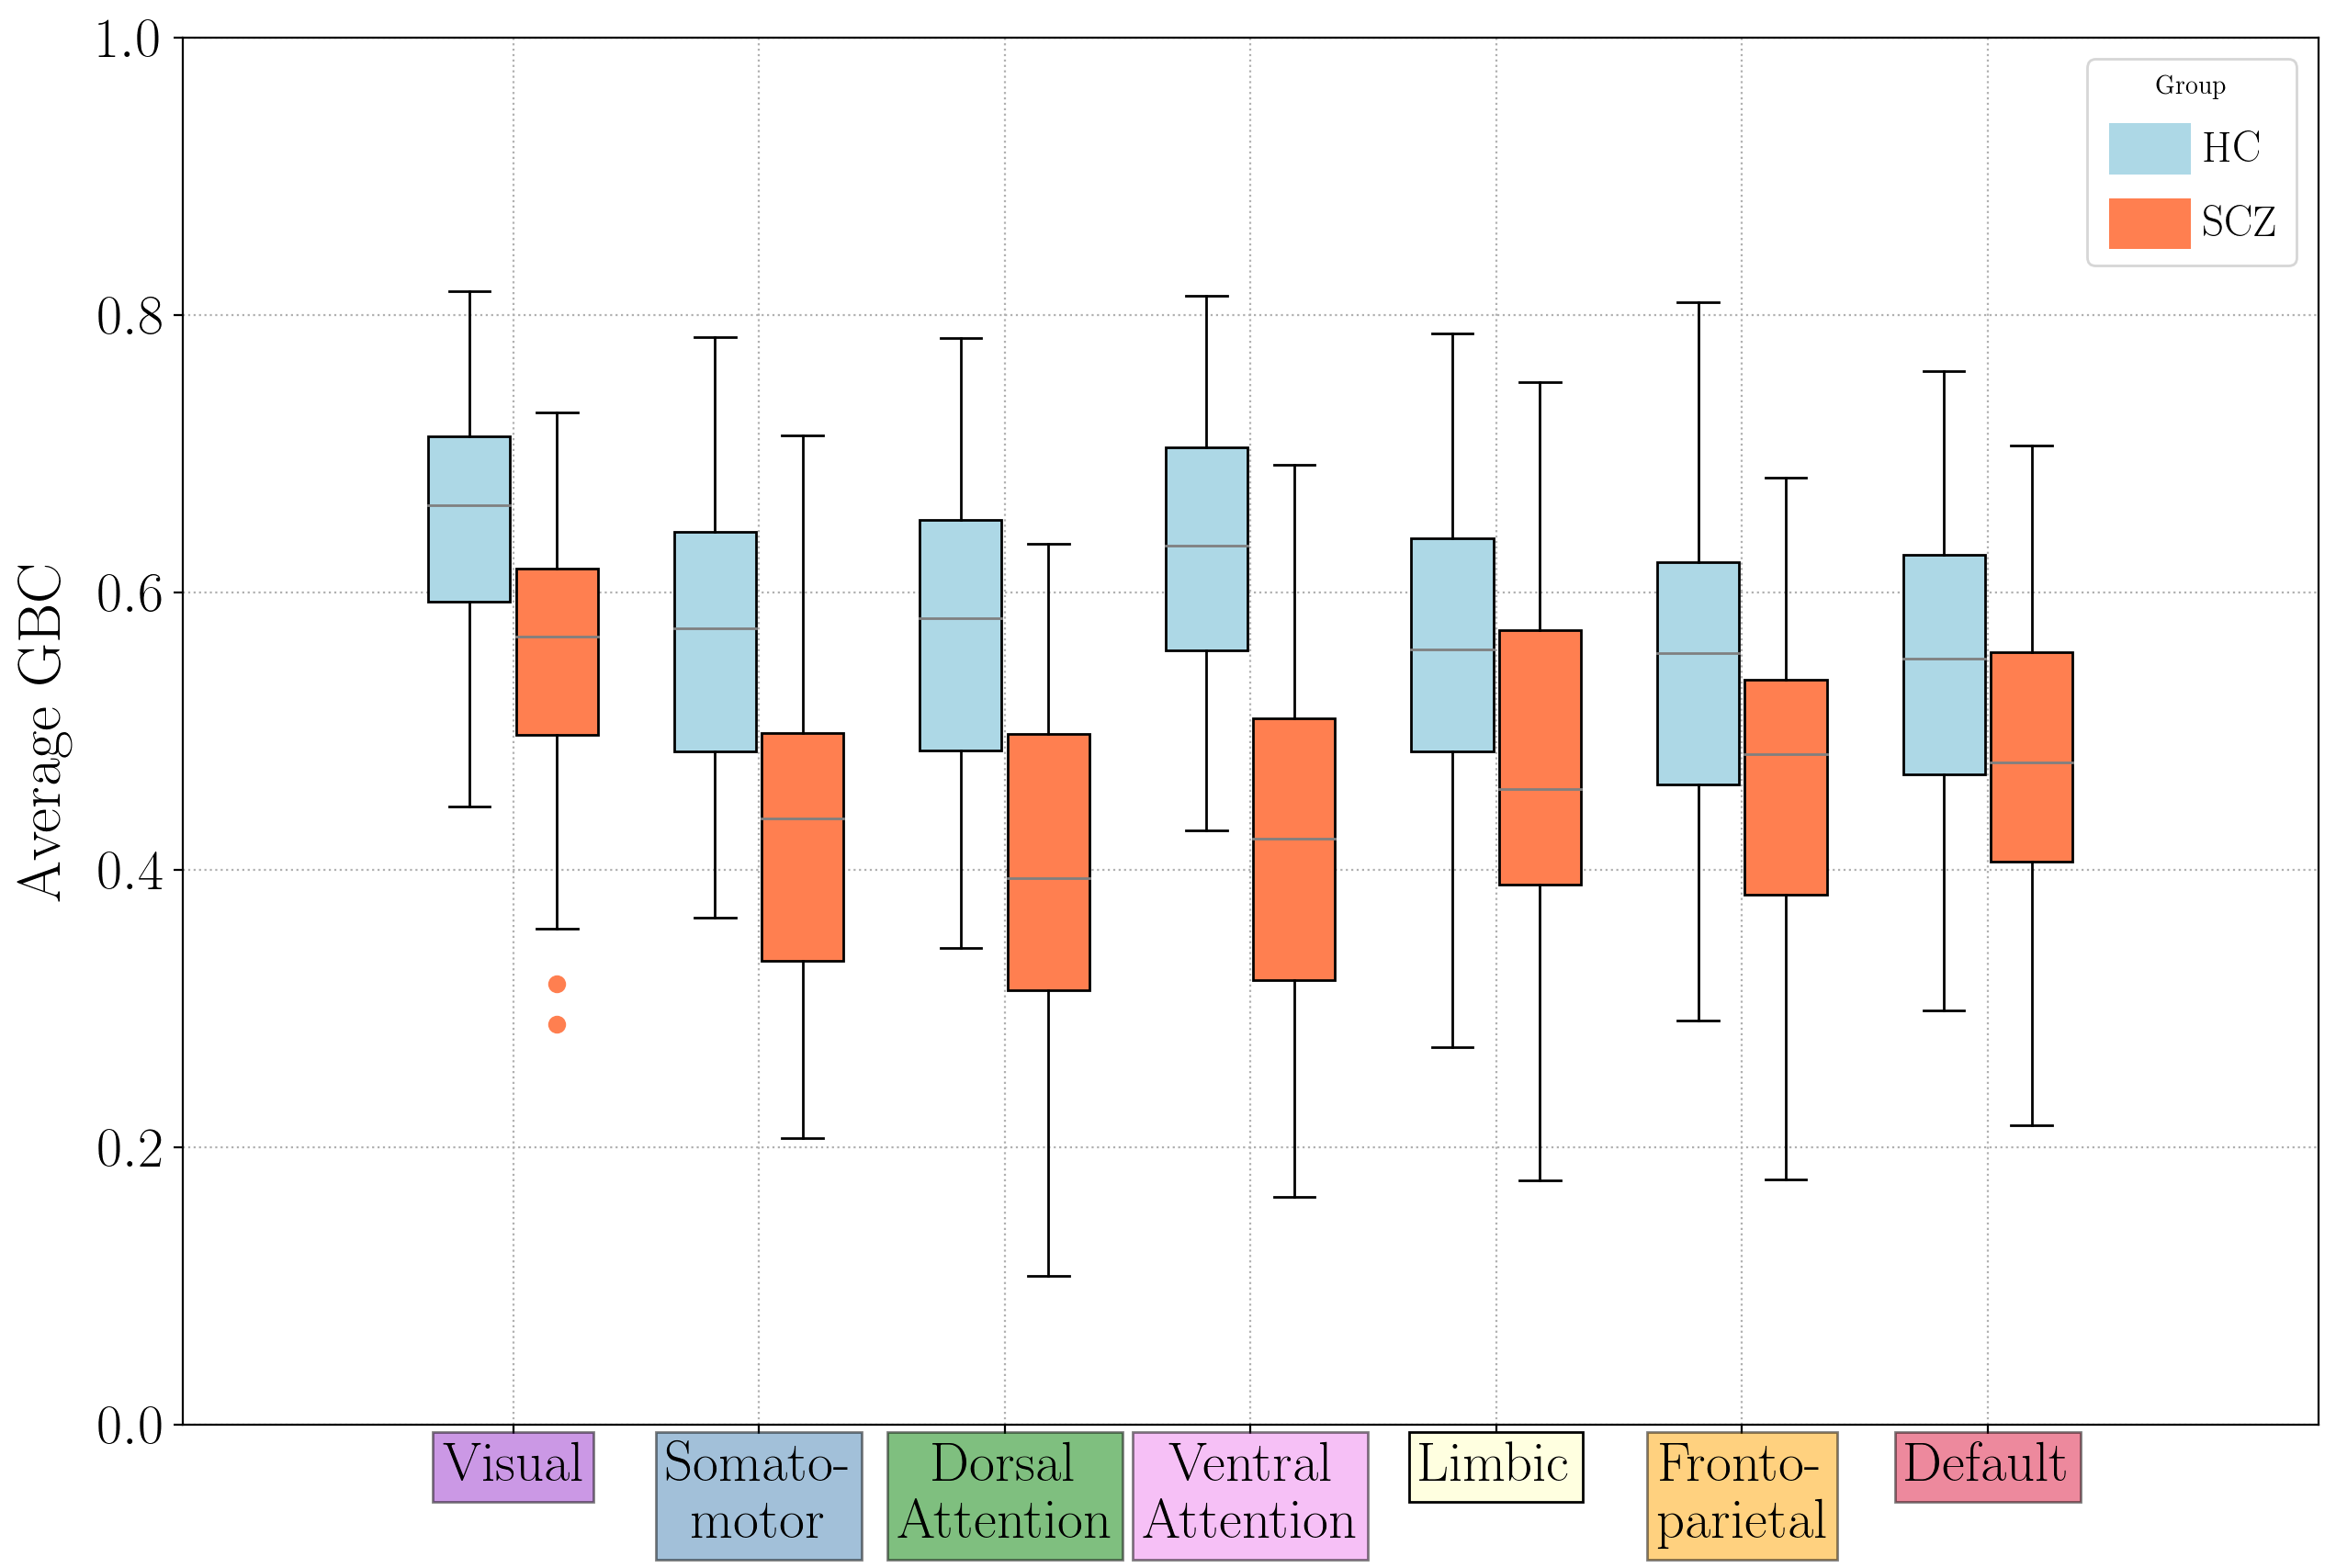

In [6]:
import matplotlib.pyplot as pl
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 150
plt.rcParams['xtick.labelsize'] = 22
plt.rcParams['ytick.labelsize'] = 22

from matplotlib import rc
import matplotlib.pylab as plt

rc('text', usetex=True)
from matplotlib import rc
import matplotlib.pylab as plt

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

from matplotlib.pyplot import figure
fig = figure(figsize=(15, 10), dpi=200)
fig.set_facecolor('w') 
#hc = [visual_hc, somatomotor_hc, dorsal_attention_hc, ventral_attention_hc, limbic_hc, frontoparietal_hc, default_hc]
#scz = [visual_scz, somatomotor_scz, dorsal_attention_scz, ventral_attention_scz, limbic_scz, frontoparietal_scz, default_scz]


colors = ['lightblue', 'coral']
data_groups = [hc, scz]

labels_list = ['Visual', 'Somato-\nmotor', 'Dorsal\nAttention', 'Ventral\nAttention', 'Limbic', 'Fronto-\nparietal', 'Default']
width       = 1/len(labels_list)
xlocations  = [ x*((1+ len(data_groups))*width) for x in range(len(hc))]

symbol      = 'r+'
ymin        = min ( [ val  for dg in data_groups  for data in dg for val in data ] )
ymax        = max ( [ val  for dg in data_groups  for data in dg for val in data ])

ax = pl.gca()
ax.set_ylim(ymin-0.1,ymax+0.1)

ax.grid(True, linestyle='dotted')
ax.set_axisbelow(True)

#pl.xlabel('Frequency', fontsize=20, loc="center", labelpad = 15)
pl.ylabel('Average GBC', fontsize=24, labelpad = 10)
#pl.title('title')

space = len(data_groups)/2
offset = len(data_groups)/2


group_positions = []
for num, dg in enumerate(data_groups):    
    _off = (0 - space + (0.5+num))
    print(_off)
    group_positions.append([x+_off*(width+0.01) for x in xlocations])

for dg, pos, c in zip(data_groups, group_positions, colors):
    boxes = ax.boxplot(dg, 
                sym=c,
                labels=['']*len(labels_list),
                positions=pos, 
                widths=width, 
                boxprops=dict(facecolor=c),                      
                medianprops=dict(color='grey'),
                patch_artist=True,
                )

    
mpl.rcParams['legend.handlelength'] = 1.5
mpl.rcParams['legend.handleheight'] = 1.5
ax.set_xticks(xlocations)
ax.set_xticklabels(labels_list, rotation=0)
ax.set_ylim([0, 1])

ax.get_xticklabels()[0].set_bbox(dict(facecolor="darkorchid", alpha=0.5))
ax.get_xticklabels()[0].set_weight("bold")
ax.get_xticklabels()[1].set_bbox(dict(facecolor="steelblue", alpha=0.5))
ax.get_xticklabels()[1].set_weight("bold")
ax.get_xticklabels()[2].set_bbox(dict(facecolor="green", alpha=0.5))
ax.get_xticklabels()[2].set_weight("bold")
ax.get_xticklabels()[3].set_bbox(dict(facecolor="violet", alpha=0.5))
ax.get_xticklabels()[3].set_weight("bold")
ax.get_xticklabels()[4].set_bbox(dict(facecolor="lightyellow", alpha=1))
ax.get_xticklabels()[4].set_weight("bold")
ax.get_xticklabels()[5].set_bbox(dict(facecolor="orange", alpha=0.5))
ax.get_xticklabels()[5].set_weight("bold")
ax.get_xticklabels()[6].set_bbox(dict(facecolor="crimson", alpha=0.5))
ax.get_xticklabels()[6].set_weight("bold")


import matplotlib.patches as patches
from matplotlib.legend_handler import HandlerPatch



class HandlerRect(HandlerPatch):

    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height,
                       fontsize, trans):

        x = width//2
        y = 0
        w = h = 10
        p = patches.Rectangle(xy=(x-10, y-5), width=w+22, height=h+10)
        self.update_prop(p, orig_handle, legend)
        p.set_transform(trans)

        return [p]
    

rect = patches.Rectangle((0,0), 1, 1, facecolor='lightblue')
rect2 = patches.Rectangle((0,0), 1, 1, facecolor='coral')

plt.legend((rect, rect2), ('HC', 'SCZ'),
            handler_map={
               patches.Rectangle: HandlerRect(),
               patches.Rectangle: HandlerRect(),
            }, title = "Group", prop={'size': 17})

plt.rcParams['legend.title_fontsize'] = 24

pl.show()

In [7]:
print(np.mean(hc[0]))
print(np.mean(hc[1]))
print(np.mean(hc[2]))
print(np.mean(hc[3]))
print(np.mean(hc[4]))
print(np.mean(hc[5]))
print(np.mean(hc[6]))
print(np.mean(scz[0]))
print(np.mean(scz[1]))
print(np.mean(scz[2]))
print(np.mean(scz[3]))
print(np.mean(scz[4]))
print(np.mean(scz[5]))
print(np.mean(scz[6]))

0.6522730955301975
0.5681664727903042
0.5758608520491139
0.628428764249848
0.5563817257411722
0.5470475756241331
0.5482143528549831
0.5577544559753683
0.4232021919532877
0.40382704895183674
0.4172808743127137
0.4674022910811699
0.46981594286749023
0.47288199698092304


In [8]:
print(np.std(hc[0]))
print(np.std(hc[1]))
print(np.std(hc[2]))
print(np.std(hc[3]))
print(np.std(hc[4]))
print(np.std(hc[5]))
print(np.std(hc[6]))
print(np.std(scz[0]))
print(np.std(scz[1]))
print(np.std(scz[2]))
print(np.std(scz[3]))
print(np.std(scz[4]))
print(np.std(scz[5]))
print(np.std(scz[6]))

0.08841923827634884
0.10276228078566882
0.10634064800065601
0.09387518390347449
0.10702769761842824
0.11150307727118361
0.10853292902079249
0.0925400182263882
0.11092071144025906
0.12659362255995096
0.11756167568000286
0.11889494933174924
0.10688652850425492
0.10876315957838521


In [9]:
import pingouin as pg

res = pg.ttest(hc[0], scz[0], correction=False)
display(res)
res = pg.ttest(hc[1], scz[1], correction=False)
display(res)
res = pg.ttest(hc[2], scz[2], correction=False)
display(res)
res = pg.ttest(hc[3], scz[3], correction=False)
display(res)
res = pg.ttest(hc[4], scz[4], correction=False)
display(res)
res = pg.ttest(hc[5], scz[5], correction=False)
display(res)
res = pg.ttest(hc[6], scz[6], correction=False)
display(res)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,7.347789,198,two-sided,5.162602e-12,"[0.07, 0.12]",1.039134,1.358e+09,1.0


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,9.539099,198,two-sided,5.510521e-18,"[0.11, 0.17]",1.349032,7.688e+14,1.0


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,10.353271,198,two-sided,2.364323e-20,"[0.14, 0.2]",1.464174,1.53e+17,1.0


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,13.964662,198,two-sided,2.671506e-31,"[0.18, 0.24]",1.974901,7.766e+27,1.0


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,5.534318,198,two-sided,9.826821e-08,"[0.06, 0.12]",0.782671,1.202e+05,0.999805


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,4.975066,198,two-sided,0.000001,"[0.05, 0.11]",0.703581,1.005e+04,0.998609


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,4.878227,198,two-sided,0.000002,"[0.04, 0.11]",0.689885,6677.641,0.998101


In [9]:
visual_emp = [] 
somatomotor_emp = []
dorsal_attention_emp = []
ventral_attention_emp = []
limbic_emp = []
frontoparietal_emp = []
default_emp = []

visual_emp_s = [] 
somatomotor_emp_s = []
dorsal_attention_emp_s = []
ventral_attention_emp_s = []
limbic_emp_s = []
frontoparietal_emp_s = []
default_emp_s = []

fc = []
fc_scz = []
for i in FC_data:
    fc.append(filterSubcortical(i))
    
for i in FC_data_scz:
    fc_scz.append(filterSubcortical(i))

for i in range(len(fc)):
    visual_emp.append(calculate_region_gbc(visual, fc[i]))
    somatomotor_emp.append(calculate_region_gbc(somatomotor, fc[i]))
    dorsal_attention_emp.append(calculate_region_gbc(dorsal_attention, fc[i]))
    ventral_attention_emp.append(calculate_region_gbc(ventral_attention, fc[i]))
    limbic_emp.append(calculate_region_gbc(limbic, fc[i]))
    frontoparietal_emp.append(calculate_region_gbc(frontoparietal, fc[i]))
    default_emp.append(calculate_region_gbc(default, fc[i]))
    visual_emp_s.append(calculate_region_gbc(visual, fc_scz[i]))
    somatomotor_emp_s.append(calculate_region_gbc(somatomotor, fc_scz[i]))
    dorsal_attention_emp_s.append(calculate_region_gbc(dorsal_attention, fc_scz[i]))
    ventral_attention_emp_s.append(calculate_region_gbc(ventral_attention, fc_scz[i]))
    limbic_emp_s.append(calculate_region_gbc(limbic, fc_scz[i]))
    frontoparietal_emp_s.append(calculate_region_gbc(frontoparietal, fc_scz[i]))
    default_emp_s.append(calculate_region_gbc(default, fc_scz[i]))

In [10]:
import numpy as np
print(np.std(visual_emp))
print(np.std(somatomotor_emp))
print(np.std(dorsal_attention_emp))
print(np.std(ventral_attention_emp))
print(np.std(limbic_emp))
print(np.std(frontoparietal_emp))
print(np.std(default_emp))

print(np.std(visual_emp_s))
print(np.std(somatomotor_emp_s))
print(np.std(dorsal_attention_emp_s))
print(np.std(ventral_attention_emp_s))
print(np.std(limbic_emp_s))
print(np.std(frontoparietal_emp_s))
print(np.std(default_emp_s))


0.1465697237738632
0.15903105381087332
0.13825936976396358
0.15115372799661736
0.15208614677696483
0.14283791554811467
0.1500892856126614
0.15618258112727368
0.18125259076646225
0.16021029391629532
0.16268390643285655
0.13566850023306753
0.16012917698483348
0.15162499814696379


In [11]:
import pingouin as pg

res1 = pg.ttest(visual_emp, visual_emp_s, correction=False)
res2 = pg.ttest(somatomotor_emp, somatomotor_emp_s, correction=False)
res3 = pg.ttest(dorsal_attention_emp, dorsal_attention_emp_s, correction=False)
res4 = pg.ttest(ventral_attention_emp, ventral_attention_emp_s, correction=False)
res5 = pg.ttest(limbic_emp, limbic_emp_s, correction=False)
res6 = pg.ttest(frontoparietal_emp, frontoparietal_emp_s, correction=False)
res7 = pg.ttest(default_emp, default_emp_s, correction=False)
display(res1)
display(res2)
display(res3)
display(res4)
display(res5)
display(res6)
display(res7)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,3.088165,70,two-sided,0.002887,"[0.04, 0.18]",0.727887,12.584,0.861165


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.846523,70,two-sided,0.005795,"[0.03, 0.2]",0.670932,7.098,0.801588


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,3.257523,70,two-sided,0.001735,"[0.05, 0.19]",0.767806,19.234,0.894816


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.785702,70,two-sided,0.006867,"[0.03, 0.18]",0.656596,6.184,0.784458


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.200827,70,two-sided,0.031049,"[0.01, 0.14]",0.51874,1.879,0.583419


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.124463,70,two-sided,0.037165,"[0.0, 0.15]",0.500741,1.639,0.553837


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.242031,70,two-sided,0.02813,"[0.01, 0.15]",0.528452,2.027,0.599199
